In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import re

In [3]:
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download()


In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [6]:
from keras.models import Sequential
from keras.layers import Embedding
import tensorflow as tf
from keras.utils.vis_utils import plot_model

## Extracting The Files

In [7]:
!tar -xvf  '/content/domain_sentiment_data.tar.gz' 

sorted_data_acl/dvd/negative.review
sorted_data_acl/dvd/unlabeled.review
sorted_data_acl/dvd/positive.review
sorted_data_acl/kitchen_&_housewares/negative.review
sorted_data_acl/kitchen_&_housewares/unlabeled.review
sorted_data_acl/kitchen_&_housewares/positive.review
sorted_data_acl/books/negative.review
sorted_data_acl/books/positive.review
sorted_data_acl/electronics/negative.review
sorted_data_acl/electronics/unlabeled.review
sorted_data_acl/electronics/positive.review


In [8]:
sorted(os.listdir(f'/content'))


['.config', 'domain_sentiment_data.tar.gz', 'sample_data', 'sorted_data_acl']

## Getting Files Full Path

In [9]:
domains_path = "/content/sorted_data_acl"

X_train_paths = {}
X_test_paths = {}


for domain in sorted(os.listdir(f'{domains_path}')):
  print(f'Current Domain is {domain}')
  domain_files = sorted(os.listdir(f'{domains_path}/{domain}'))

  print(domain_files)
  for file in  domain_files:
    print(f'{domains_path}/{domain}/{file}')

    current_file =  f'{domains_path}/{domain}/{file}'
    sentiment = file.split(".")[0] 

    if sentiment == "unlabeled" :
      continue 

    if domain == "kitchen_&_housewares":
      X_test_paths[ current_file ] = sentiment
    else :
      X_train_paths[ current_file ] = sentiment
  
  print('\n')




Current Domain is books
['negative.review', 'positive.review']
/content/sorted_data_acl/books/negative.review
/content/sorted_data_acl/books/positive.review


Current Domain is dvd
['negative.review', 'positive.review', 'unlabeled.review']
/content/sorted_data_acl/dvd/negative.review
/content/sorted_data_acl/dvd/positive.review
/content/sorted_data_acl/dvd/unlabeled.review


Current Domain is electronics
['negative.review', 'positive.review', 'unlabeled.review']
/content/sorted_data_acl/electronics/negative.review
/content/sorted_data_acl/electronics/positive.review
/content/sorted_data_acl/electronics/unlabeled.review


Current Domain is kitchen_&_housewares
['negative.review', 'positive.review', 'unlabeled.review']
/content/sorted_data_acl/kitchen_&_housewares/negative.review
/content/sorted_data_acl/kitchen_&_housewares/positive.review
/content/sorted_data_acl/kitchen_&_housewares/unlabeled.review




In [10]:
X_train_paths

{'/content/sorted_data_acl/books/negative.review': 'negative',
 '/content/sorted_data_acl/books/positive.review': 'positive',
 '/content/sorted_data_acl/dvd/negative.review': 'negative',
 '/content/sorted_data_acl/dvd/positive.review': 'positive',
 '/content/sorted_data_acl/electronics/negative.review': 'negative',
 '/content/sorted_data_acl/electronics/positive.review': 'positive'}

In [11]:
X_test_paths

{'/content/sorted_data_acl/kitchen_&_housewares/negative.review': 'negative',
 '/content/sorted_data_acl/kitchen_&_housewares/positive.review': 'positive'}

## Loading The Training Reviews

In [12]:
def clean_text(text):

  no_extra_spaces = re.sub("\s+", " ", text)

  no_new_lines = re.sub("\n+", "", no_extra_spaces)

  only_alphabets = re.sub("[^a-zA-Z]"," ", no_new_lines)

  words = word_tokenize(only_alphabets.lower())

  lemmatizer = WordNetLemmatizer()

  lemma_words = [lemmatizer.lemmatize(i) for i in words]

  return lemma_words

def read_file(path):
  with open(path) as file:
    content = file.read()  
    soup = BeautifulSoup(content, "lxml")

  reviews = soup.find_all("review_text")

  reviews_text = [clean_text(review.get_text()) for review in reviews]
  return reviews_text



test = read_file("/content/sorted_data_acl/books/positive.review")
print(test[0][:10])

['sphere', 'by', 'michael', 'crichton', 'is', 'an', 'excellant', 'novel', 'this', 'wa']


In [31]:
X_train = np.array([])
X_test = np.array([])

y_train = np.array([])
y_test = np.array([])

# Loading Train Data

for key,value in X_train_paths.items():
  reviews = np.array(read_file(key))
  labels = np.array([0 if value == "positive" else 1 for x in reviews])

  print(f'Current File Is {key}, Number Of Reviews is {len(reviews)} , Number Of Labels is {len(labels)} , Label is {labels[0]} ')
  
  X_train = np.concatenate([X_train, reviews])
  y_train = np.concatenate([y_train, labels])





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':


Current File Is /content/sorted_data_acl/books/negative.review, Number Of Reviews is 1000 , Number Of Labels is 1000 , Label is 1 
Current File Is /content/sorted_data_acl/books/positive.review, Number Of Reviews is 1000 , Number Of Labels is 1000 , Label is 0 
Current File Is /content/sorted_data_acl/dvd/negative.review, Number Of Reviews is 1000 , Number Of Labels is 1000 , Label is 1 
Current File Is /content/sorted_data_acl/dvd/positive.review, Number Of Reviews is 1000 , Number Of Labels is 1000 , Label is 0 
Current File Is /content/sorted_data_acl/electronics/negative.review, Number Of Reviews is 1000 , Number Of Labels is 1000 , Label is 1 
Current File Is /content/sorted_data_acl/electronics/positive.review, Number Of Reviews is 1000 , Number Of Labels is 1000 , Label is 0 


In [32]:
print(X_train.shape)
print(y_train.shape)


(6000,)
(6000,)


In [ ]:
X_train[:10]

## Word Embedding

In [34]:
unique_words = set()
len_max = 0

for sent in (X_train):
    unique_words.update(sent)
    if(len_max < len(sent)):
        len_max = len(sent)

# length of the list of unique_words 
print('Number of vocabs: ', len(list(unique_words)))
print('Max length of text is: ', len_max)

Number of vocabs:  31359
Max length of text is:  3485


In [35]:
vocab_size = len(list(unique_words))
embedding_dim = 300
max_length = len_max
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [36]:
X_train

array([list(['this', 'book', 'wa', 'horrible', 'if', 'it', 'wa', 'possible', 'to', 'rate', 'it', 'lower', 'than', 'one', 'star', 'i', 'would', 'have', 'i', 'am', 'an', 'avid', 'reader', 'and', 'picked', 'this', 'book', 'up', 'after', 'my', 'mom', 'had', 'gotten', 'it', 'from', 'a', 'friend', 'i', 'read', 'half', 'of', 'it', 'suffering', 'from', 'a', 'headache', 'the', 'entire', 'time', 'and', 'then', 'got', 'to', 'the', 'part', 'about', 'the', 'relationship', 'the', 'year', 'old', 'boy', 'had', 'with', 'a', 'year', 'old', 'man', 'and', 'i', 'lit', 'this', 'book', 'on', 'fire', 'one', 'le', 'copy', 'in', 'the', 'world', 'don', 't', 'waste', 'your', 'money', 'i', 'wish', 'i', 'had', 'the', 'time', 'spent', 'reading', 'this', 'book', 'back', 'so', 'i', 'could', 'use', 'it', 'for', 'better', 'purpose', 'this', 'book', 'wasted', 'my', 'life']),
       list(['i', 'like', 'to', 'use', 'the', 'amazon', 'review', 'when', 'purchasing', 'book', 'especially', 'alert', 'for', 'dissenting', 'percept

In [37]:
list(X_train[0][:10])

['this', 'book', 'wa', 'horrible', 'if', 'it', 'wa', 'possible', 'to', 'rate']

In [38]:
tokenizer = Tokenizer(num_words = vocab_size,
                      oov_token = oov_tok,
                      char_level = False)

tokenizer.fit_on_texts(list(X_train))

# Training
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train,
                        maxlen = max_length,
                        padding = padding_type,
                        truncating = trunc_type)



In [39]:
X_train

array([[  11,   21,   18, ...,    0,    0,    0],
       [   7,   42,    5, ...,    0,    0,    0],
       [  11,   21,   18, ...,    0,    0,    0],
       ...,
       [   7,  114,   61, ...,    0,    0,    0],
       [  11, 6304,    9, ...,    0,    0,    0],
       [   2,  972,   68, ...,    0,    0,    0]], dtype=int32)

## Model

## Using this LSTM Model Will gives us better results but I Cant use it duo to memory error in colab, and it is too slow


In [40]:
# model = Sequential()
# model.add(Embedding(vocab_size,300,input_length = max_length))
# model.add(SpatialDropout1D(0.4))
# model.add(Bidirectional(LSTM(256, dropout = 0.8, recurrent_dropout=0.8, return_sequences=True)))
# model.add(Bidirectional(LSTM(128,dropout = 0.5,recurrent_dropout=0.5,return_sequences=True)))
# model.add(Bidirectional(GRU(128,return_sequences=False)))
# model.add(Dropout(0.4))
# model.add(Dense(2,activation='softmax'))


## 1D CNN Model

In [41]:
model = Sequential()


model.add(Embedding(vocab_size,300,input_length = max_length))
model.add(tf.keras.layers.Conv1D(64, 8, activation="relu"))
model.add(tf.keras.layers.MaxPooling1D(2))
model.add(tf.keras.layers.Conv1D(32, 8, activation="relu"))
model.add(tf.keras.layers.MaxPooling1D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(2,  activation="softmax"))



model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3485, 300)         9407700   
                                                                 
 conv1d_2 (Conv1D)           (None, 3478, 64)          153664    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1739, 64)         0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 1732, 32)          16416     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 866, 32)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 27712)            

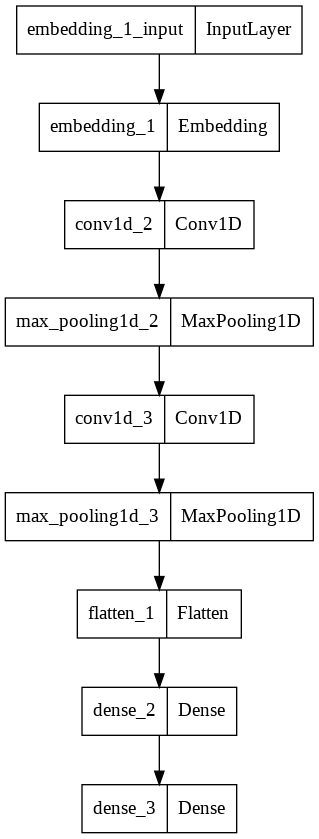

In [42]:
plot_model(model, to_file='model.png')

In [43]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=512, epochs=40, verbose = 1  , validation_split=0.1)


Epoch 1/40
11/11 [==============================] - 8s 665ms/step - loss: 0.7966 - accuracy: 0.5320 - val_loss: 0.9435 - val_accuracy: 0.0000e+00
Epoch 2/40
11/11 [==============================] - 7s 643ms/step - loss: 0.6890 - accuracy: 0.5556 - val_loss: 0.7864 - val_accuracy: 0.0000e+00
Epoch 3/40
11/11 [==============================] - 7s 646ms/step - loss: 0.6852 - accuracy: 0.5578 - val_loss: 0.7634 - val_accuracy: 0.0717
Epoch 4/40
11/11 [==============================] - 7s 649ms/step - loss: 0.6786 - accuracy: 0.5720 - val_loss: 0.8507 - val_accuracy: 0.0367
Epoch 5/40
11/11 [==============================] - 7s 656ms/step - loss: 0.6365 - accuracy: 0.6222 - val_loss: 1.1467 - val_accuracy: 0.2133
Epoch 6/40
11/11 [==============================] - 7s 654ms/step - loss: 0.4850 - accuracy: 0.7861 - val_loss: 0.7683 - val_accuracy: 0.6567
Epoch 7/40
11/11 [==============================] - 7s 657ms/step - loss: 0.2429 - accuracy: 0.9028 - val_loss: 0.9022 - val_accuracy: 0.688

## Plotting Model`s Accuracy and Loss

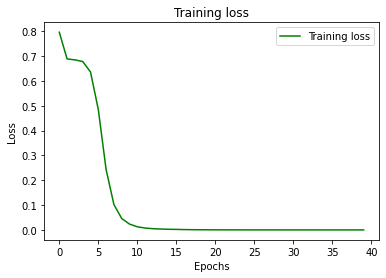

In [44]:
loss_train = history.history['loss']
epochs = range(40)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

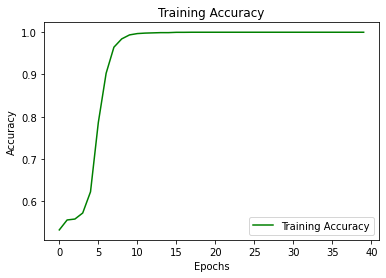

In [45]:
accuracy_train = history.history['accuracy']
epochs = range(40)
plt.plot(epochs, accuracy_train, 'g', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Loading The Testing Reviews

In [46]:
# Loading Test Data

for key,value in X_test_paths.items():
  reviews = np.array(read_file(key))
  labels = np.array([0 if value == "positive" else 1 for x in reviews])

  print(f'Current File Is {key}, Number Of Reviews is {len(reviews)} , Number Of Labels is {len(labels)} , Label is {labels[0]} ')
  
  X_test = np.concatenate([X_test, reviews])
  y_test = np.concatenate([y_test, labels])  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


Current File Is /content/sorted_data_acl/kitchen_&_housewares/negative.review, Number Of Reviews is 1000 , Number Of Labels is 1000 , Label is 1 
Current File Is /content/sorted_data_acl/kitchen_&_housewares/positive.review, Number Of Reviews is 1000 , Number Of Labels is 1000 , Label is 0 


In [47]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test,
                       maxlen = max_length,
                       padding = padding_type,
                       truncating = trunc_type)

print(X_test.shape)
print(y_test.shape)

(2000, 3485)
(2000,)


## Evaluate The Test Data

In [48]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 72.299999


# Then This Model Accuracy on the unseen reviews is 72.3